Challenges with the Kaggle Leader Board are cancelled due to the complexity of the preparation process,

Replace public data analytics with hands-on mini-tasks.

1. Dataset

Use of data provided to domestic public data portals 

https://www.data.go.kr/

2. Analysis

Choose your analytical objectives and techniques based on and expanding what you learned in class

3. Contents of submission

- Create a report describing the dataset and its purpose, method, visualization of the feasibility of the analysis, etc

- Include code links accessible via github or colab in the report

- We don't provide a report form, so please fill it out on your own.

- Submitted after converting the prepared report into pdf

4. Deadline

- December 28th 23:59 (no extension)

<h2>Movie Recommendation System</h2>
<h5>I will try to build a movie reccomendation system practicing Recommendation system we have learned in the class with open <a link="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">TMDB 5000 Movie Dataset</a> on Kaggle.</h5>

<h5>Step 1.  Exploratory Data Analysis (EDA)</h5>
<ul>
    <li>Understand the Dataset</li>
    <li>Visualize Relationships</li>
</ul>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [5]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [126]:
df1.head(3)

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [127]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [130]:
df= df2.merge(df1,on='id')

In [129]:
print(df.shape)
print(df.columns)

(4803, 23)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')


In [8]:
# check for null vallues
df['vote_count'].isnull().sum()

0

**Need to compute the movie ratings, so Weighted Rating Formula is used**
The formula for the weighted rating is:

$$WR = \frac{v}{v+m} \cdot R + \frac{m}{v+m} \cdot C$$

Where:
- $R$: Average rating of the movie.
- $v$: Number of votes for the movie.
- $m$: Minimum votes required to be included. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.
- $C$: Mean of all average ratings.



In [9]:
R = df['vote_average']
C = R.mean()
print(R)
print(C)


0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64
6.092171559442016


In [10]:
v = df['vote_count']
v

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [11]:
print(df['vote_count'].dtype)


int64


In [12]:
m = df['vote_count'].quantile(0.9)
m


1838.4000000000015

In [13]:
qualifying_movies = df.copy().loc[df['vote_count']>= m]
qualifying_movies['original_title'].sample(5)

1594    Corpse Bride
301      Cloud Atlas
3753         Boyhood
118      Ratatouille
1153            Lucy
Name: original_title, dtype: object

In [14]:
qualifying_movies['weighted_rating'] = ((v/(v+m))*R+(m/(v+m))*C) 
qualifying_movies = qualifying_movies.sort_values('weighted_rating', ascending=False).reset_index()
qualifying_movies[['title', 'weighted_rating']]

,title,weighted_rating
0,The Shawshank Redemption,8.059258
1,Fight Club,7.939256
2,The Dark Knight,7.920020
3,Pulp Fiction,7.904645
4,Inception,7.863239
...,...,...
476,Green Lantern,5.521697
477,A Good Day to Die Hard,5.507643
478,After Earth,5.459420
479,Independence Day: Resurgence,5.406234


In [15]:
qualifying_movies['popularity']

0      136.747729
1      146.757391
2      187.322927
3      121.463076
4      167.583710
          ...    
476     51.872839
477     65.402595
478     42.840582
479     48.775723
480     38.126095
Name: popularity, Length: 481, dtype: float64

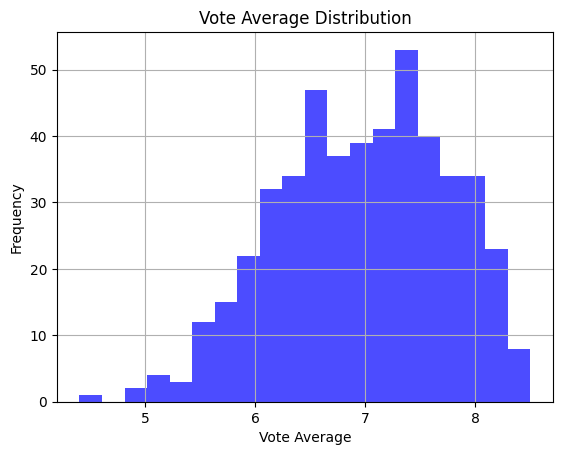

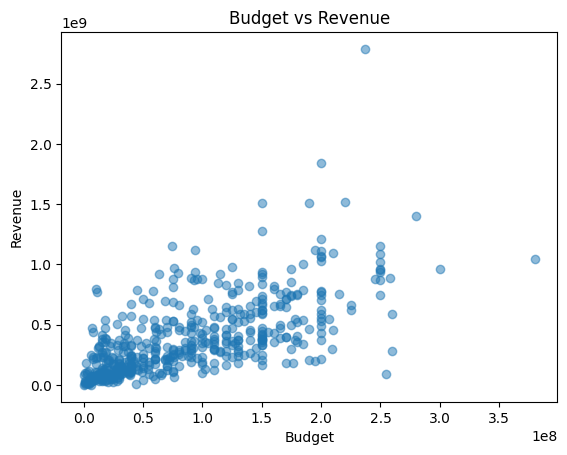

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution
qualifying_movies['vote_average'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Correlation scatter plot
plt.scatter(qualifying_movies['budget'], qualifying_movies['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


Text(0.5, 1.0, 'Popular Movies')

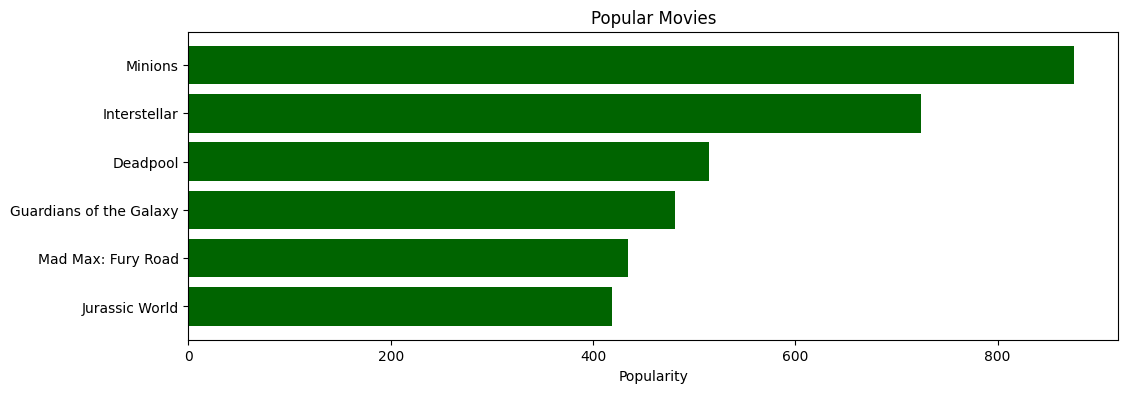

In [17]:
pop = df.sort_values('popularity', ascending=False)


plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center', color='darkgreen')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

<h4>Step 2: Similarity and Distance</h4>

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. We will compute the similarity using TF-IDF and Cosine similarity like we have learned in 4.A chapter.

<em>To revise <a link="https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3">TF-IDF</a> and understanding what is behind the concept of computing Cosine Similarity with TF-IDF Features means comparing the textual similarity between two pieces of text based on their semantic content. </em>
<ul>
    <li>The TF-IDF vectorizer converts a collection of text (like movie overviews) into numerical vectors.</li>
    <li>Each vector represents the importance of specific words in the text, considering how frequently they appear across all documents.</li>
    <li>By calculating the cosine similarity between TF-IDF vectors, we measure how "similar" the textual descriptions are, despite differences in exact wording.</li>

</ul>

In [18]:
df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# stop_words is for removing all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['overview'])

tfidf_matrix.shape

(4803, 20978)

$$\text{Cosine similarity} = \frac {A \cdot B}{\|{A}\| \cdot \|{B}\| } = \frac {\sum_{i=1}^n A_i B_i}{\sqrt{\sum_{i=1}^n A_i^2} \sqrt{\sum_{i=1}^n B_i^2}}$$

I have found out that the TF-IDF vectorizer provided by scikit-learn automatically normalizes each vector to unit length (L2 norm) during transformation. Hence, the denominator in the cosine similarity formula becomes redundant, so using linear_kernel will give us the dot product which is same as computing Cosine Similarity but simplyfing, in this case.

In [57]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


<h4>Step 3: Recommendation System"</h4>


<h5>Step 3.1 Content-based Recommendation Systems</h5>
The below is a function that takes a movie title as an input and returns 10 most similar movies. 

In [91]:
def get_top_n_sim_movies(title, cosine_sim=cosine_sim, n=10):
    idx = list(df.index[df['title']==title])
    simi_movies = list(enumerate(cosine_sim[idx[0]])) # idx is returned as a list!
    simi_scores = sorted(simi_movies, key=lambda x: x[1], reverse=True)[1:n+1]
    simi_indices = [i[0] for i in simi_scores]
    return df['title'].iloc[simi_indices]

In [92]:
title  = 'Avatar'
print(get_top_n_sim_movies(title, cosine_sim))

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object


In [70]:
index = df.loc[df['title'] == title].index
index

Index([25], dtype='int64')

Alternative way 

In [103]:
# Alternative way
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

df['combined_features'] = df['genres'] + " " + df['keywords'] + " " + df['cast'] #might be good idea to add director or top casting


In [117]:
import re

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'\s+', ' ', text)  #remove extra spaces
    text = re.sub(r'[^\w\s,]', '', text)  #remove punctuation
    return text        

In [118]:
for c in df[['combined_features']].columns:
    df[c] = df[c].apply(clean_text)

In [119]:
vectorizer = CountVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df['combined_features'])

cosine_sim2 = cosine_similarity(feature_matrix)

In [121]:
title  = 'Avatar'
print(get_top_n_sim_movies(title, cosine_sim2))

281     American Gangster
65        The Dark Knight
287      Django Unchained
849            Changeling
159            Spider-Man
68               Iron Man
2459           The Artist
1405          The Pianist
2105     12 Years a Slave
277         Casino Royale
Name: title, dtype: object


In [124]:
#Let's try also adding overview

df['combined_features2'] = df['overview'] + " " + df['genres'] + " " + df['keywords'] + " " + df['cast'] 
for c in df[['combined_features2']].columns:
    df[c] = df[c].apply(clean_text)

vectorizer = CountVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df['combined_features2'])

cosine_sim2_2 = cosine_similarity(feature_matrix)

title  = 'Avatar'
print(get_top_n_sim_movies(title, cosine_sim2_2)) 

#Output is not much different from cosine_sim2

281                      American Gangster
65                         The Dark Knight
287                       Django Unchained
849                             Changeling
159                             Spider-Man
68                                Iron Man
2459                            The Artist
1405                           The Pianist
9       Batman v Superman: Dawn of Justice
2105                      12 Years a Slave
Name: title, dtype: object


<h5>Step 2.2 Collaborative Filtering </h5> 

<h4>Step 4: Classification Models</h4>


<h4>Step 5: Clustering</h4>

<h4>Step 6: Association Rules</h4>

<h4>Step 7: Gaussian Mixture Models (GMM)</h4>

<h4>Step 8: MLE, MAP, EM</h4>